<a href="https://colab.research.google.com/github/QuratulAinAisha/first-contributions/blob/master/AlexnetImplementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [84]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np

In [85]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten,\
 Conv2D, MaxPooling2D,BatchNormalization

Getting dataset from Tensor Flow

In [86]:
(train_dataset, test_dataset), info = tfds.load(
    'cats_vs_dogs',
    split = ('train[:80%]', 'train[80%:]'),
    with_info = True,
    as_supervised=True)

Checking the Image and associated label with it within the dataset

In [87]:
len(train_dataset), len(test_dataset)
for X, y in train_dataset:
  print(X.shape, y.numpy())
  image_1 = X.numpy()
  break

(262, 350, 3) 1


# Applying Data augmentation techniques

Normalizing and resing the images to fit in the model i.e. 227x227

In [88]:
def normalize_img(image, label):
  return (tf.cast(image, tf.float32) / 255.0, label)

def resize(image, label):
  return (tf.image.resize(image, (227, 227)), label)

In [89]:
train_dataset = train_dataset.map(resize, num_parallel_calls=tf.data.AUTOTUNE)
train_dataset = train_dataset.map(normalize_img, num_parallel_calls=tf.data.AUTOTUNE)

Shuffling through the dataset with the batch size of 4

-- shuffle value = 827//500 means the shuffling value is kept smaller for a shuffle operation due to limited computational power here

In [90]:
SHUFFLE_VAL = 827 // 500
BATCH_SIZE = 16

train_dataset = train_dataset.shuffle(SHUFFLE_VAL)
train_dataset = train_dataset.batch(BATCH_SIZE)
train_dataset = train_dataset.prefetch(tf.data.AUTOTUNE)

test dataset normalization and autotuning to improve dataset

In [91]:
test_dataset = test_dataset.map(resize, num_parallel_calls=tf.data.AUTOTUNE)
test_dataset = test_dataset.map(normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE)

test_dataset = test_dataset.prefetch(tf.data.AUTOTUNE)

Checking the new image and label of the dataset after applying augemnation and normalization techniques

In [92]:
for (img, label) in train_dataset:
  print(img.numpy().shape, label.numpy())
  break

(16, 227, 227, 3) [1 1 1 0 1 1 0 0 1 1 1 0 0 1 0 0]


# AlexNet Archiecture

In [93]:
#Create a sequential model
model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(filters=96, input_shape=(227,227,3), kernel_size=(11,11),\
 strides=(4,4), padding='valid'))
model.add(Activation('relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))
# Batch Normalisation before passing it to the next layer
model.add(BatchNormalization())

In [94]:
# 2nd Convolution Layer
model.add(Conv2D(filters=256 , kernel_size = (5,5 ), \
          strides = (1,1), padding = 'same'))
model.add(Activation('relu'))
#Pooling
model.add(MaxPooling2D(pool_size=( 3,3 ), strides= ( 2,2 ), padding = 'valid'))
#BatchNormalisation
model.add(BatchNormalization())


In [95]:
# 3rd Convolution Layer
model.add(Conv2D(filters=384 , kernel_size = (3,3 ), \
          strides = (1,1), padding = 'same'))
model.add(Activation('relu'))
#BatchNormalisation
model.add(BatchNormalization())

In [96]:
# 4th Convolution Layer
model.add(Conv2D(filters=384 , kernel_size = (3,3 ), \
          strides = (1,1), padding = 'same'))
model.add(Activation('relu'))
#BatchNormalisation
model.add(BatchNormalization())

In [97]:
# 5th Convolution Layer
model.add(Conv2D(filters=256 , kernel_size = (3,3 ), \
          strides = (1,1), padding = 'same'))
model.add(Activation('relu'))
#Pooling
model.add(MaxPooling2D(pool_size=( 3,3 ), strides= ( 2,2 ), padding = 'valid'))
#BatchNormalisation
model.add(BatchNormalization())

In [98]:
# Passing it to a 1st dense layer
model.add(Flatten())
# 1st Dense Layer
model.add(Dense(4096, input_shape=(227*227*3,)))
model.add(Activation('relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

In [99]:
model.add(Dense(4096))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

In [100]:
# 3rd Dense Layer
model.add(Dense(4096))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())


Sigmoid fubction is used as the classification is going to be done on a binary dataset ( Cat or dog)

In [101]:
# Output Layer
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 55, 55, 96)        34944     
                                                                 
 activation_36 (Activation)  (None, 55, 55, 96)        0         
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 27, 27, 96)        0         
 ng2D)                                                           
                                                                 
 batch_normalization_32 (Ba  (None, 27, 27, 96)        384       
 tchNormalization)                                               
                                                                 
 conv2d_21 (Conv2D)          (None, 27, 27, 256)       614656    
                                                                 
 activation_37 (Activation)  (None, 27, 27, 256)      

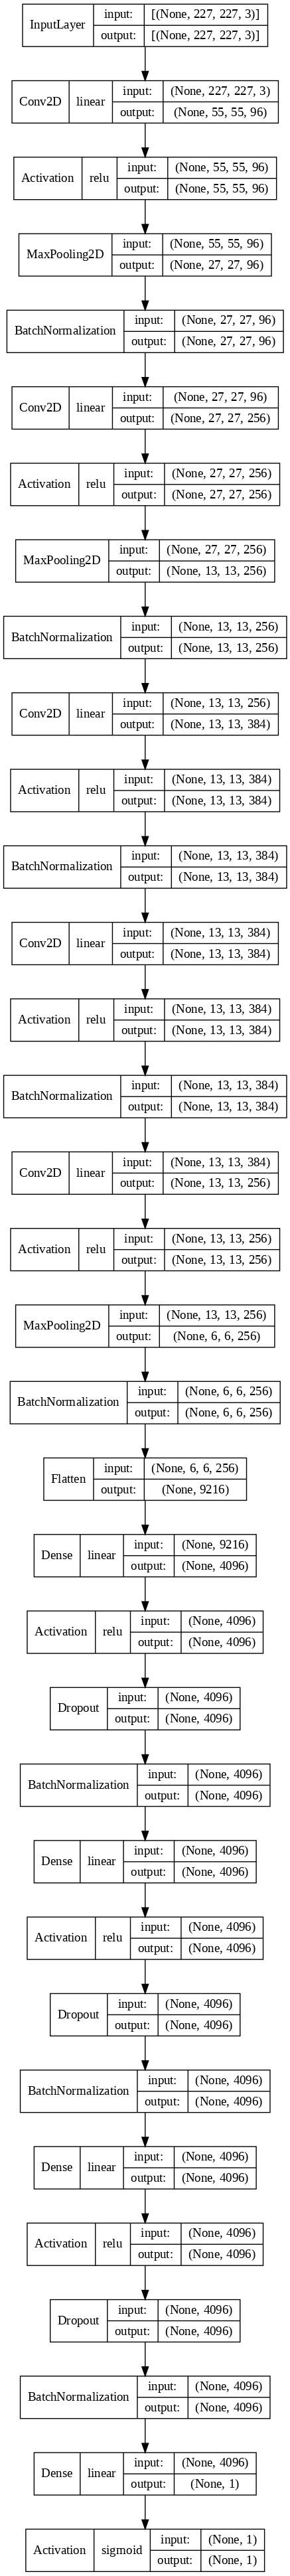

In [102]:
tf.keras.utils.plot_model(
    model,
    to_file='model.png',
    show_shapes=True,
    show_dtype=False,
    show_layer_names=False,
    show_layer_activations=True,
    dpi=100
)

In [103]:
for (img, label) in train_dataset:
  print(model(img).numpy().shape, label.numpy())
  break

(16, 1) [1 1 1 0 1 1 0 0 1 1 1 0 0 1 0 0]


In [104]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

model.compile(loss=BinaryCrossentropy(),
              optimizer=Adam(learning_rate=0.00001), metrics=['accuracy'])
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(patience=5,
                   monitor='loss')
model.fit(train_dataset, epochs=55, validation_data=test_dataset,
          callbacks=[es])

Epoch 1/55
1164/1164 [==============================] - 71s 56ms/step - loss: 0.7588 - accuracy: 0.6078 - val_loss: 0.5819 - val_accuracy: 0.6997
Epoch 2/55
1164/1164 [==============================] - 62s 53ms/step - loss: 0.6870 - accuracy: 0.6600 - val_loss: 0.5211 - val_accuracy: 0.7485
Epoch 3/55
1164/1164 [==============================] - 65s 56ms/step - loss: 0.6531 - accuracy: 0.6851 - val_loss: 0.5173 - val_accuracy: 0.7569
Epoch 4/55
1164/1164 [==============================] - 65s 56ms/step - loss: 0.5928 - accuracy: 0.7191 - val_loss: 0.5154 - val_accuracy: 0.7676
Epoch 5/55
1164/1164 [==============================] - 60s 52ms/step - loss: 0.5608 - accuracy: 0.7438 - val_loss: 0.5161 - val_accuracy: 0.7752
Epoch 6/55
1164/1164 [==============================] - 62s 53ms/step - loss: 0.5272 - accuracy: 0.7609 - val_loss: 0.5554 - val_accuracy: 0.7709
Epoch 7/55
1164/1164 [==============================] - 65s 55ms/step - loss: 0.4822 - accuracy: 0.7870 - val_loss: 0.5291 -